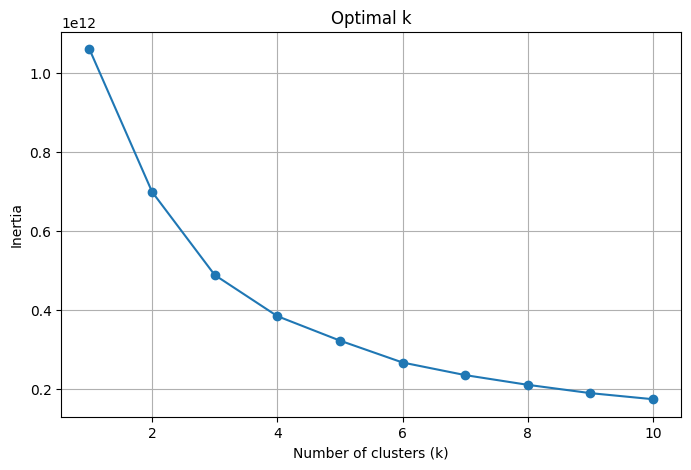

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('/content/USA_Housing.csv')
data_without_price = data.drop(columns=['Price'])

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_without_price)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.8 MB/s eta 0:00:00


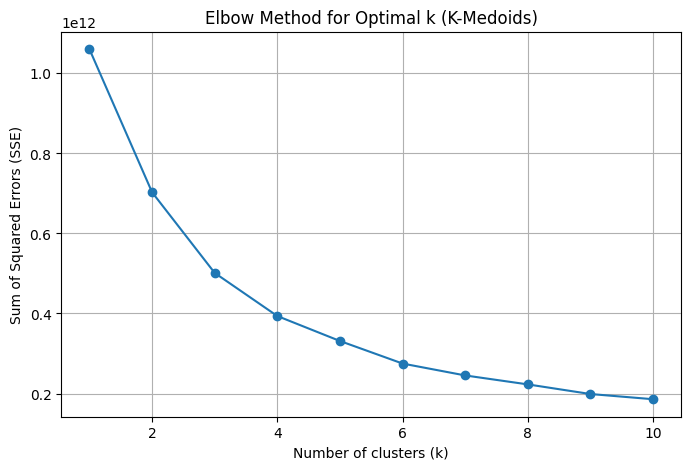

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  Cluster  
0                          4.09      23086.80050  1.059034e+06        0  
1                          3.09      40173.07217  1.505891e+06        2  
2                          5.13      36882.15940  1.058988e+06        1  
3                          3.26      34310.24283  1.260617e+06        1  
4                          4.23      26354.10947  6.309435e+05        1  


In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances

data = pd.read_csv('/content/USA_Housing.csv')
data_without_price = data.drop(columns=['Price'])

sse = []
k_values = range(1, 11)

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0, metric='euclidean')
    kmedoids.fit(data_without_price)

    pairwise_dist = pairwise_distances(data_without_price, kmedoids.cluster_centers_)
    min_dist = pairwise_dist.min(axis=1)
    sse.append((min_dist**2).sum())

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k (K-Medoids)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

optimal_k = 3
kmedoids = KMedoids(n_clusters=optimal_k, random_state=0, metric='euclidean')
kmedoids.fit(data_without_price)

data['Cluster'] = kmedoids.labels_
print(data.head())
